# Feature Distribution Prenatal Brain  

In [1]:
!date

Mon Oct 14 02:50:03 PDT 2024


In [2]:
%env CONDA_PREFIX

'/c4/home/derek/miniconda3/envs/py310'

In [3]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [4]:
!read_distribution.py

Usage: read_distribution.py [options]

Check reads distribution over exon, intron, UTR, intergenic ... etc
The following reads will be skipped:
	qc_failed
	PCR duplicate
	Unmapped
	Non-primary (or secondary)	



Options:
  --version             show program's version number and exit
  -h, --help            show this help message and exit
  -i INPUT_FILE, --input-file=INPUT_FILE
                        Alignment file in BAM or SAM format.
  -r REF_GENE_MODEL, --refgene=REF_GENE_MODEL
                        Reference gene model in bed format.


In [ ]:
!read_distribution.py -i \
                        -r 

In [13]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/STAR_outs/GW17_1/StarOut/'

output_dir = './plots/'

In [14]:
threeprime = pd.read_fwf(input_dir+'read_distribution_3prime.txt', 
            skiprows=list(range(0,7))+list(range(12,19)),
                       # index_col=0
           )

internal = pd.read_fwf(input_dir+'read_distribution_internal.txt', 
            skiprows=list(range(0,7))+list(range(12,19)),
                       # index_col=0
           )

fiveprime = pd.read_fwf(input_dir+'read_distribution_5prime.txt', 
            skiprows=list(range(0,7))+list(range(12,19)),
                        # index_col=0
           )

In [23]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/10X/Lane1/'

tenx = pd.read_fwf(input_dir+'read_distribution_10X.txt', 
            skiprows=list(range(0,4))+list(range(9,16)),
                       # index_col=0
           )

In [25]:
# internal.index.name = None
# fiveprime.index.name = None

In [26]:
threeprime['Tag_count_percent'] = threeprime.Tag_count.apply(lambda x: (x) / (threeprime.Tag_count.sum()))

internal['Tag_count_percent'] = internal.Tag_count.apply(lambda x: (x) / (internal.Tag_count.sum()))

fiveprime['Tag_count_percent'] = fiveprime.Tag_count.apply(lambda x: (x) / (fiveprime.Tag_count.sum()))

tenx['Tag_count_percent'] = tenx.Tag_count.apply(lambda x: (x) / (tenx.Tag_count.sum()))




threeprime['library'] = '3prime'
internal['library'] = 'internal'
fiveprime['library'] = '5prime'

tenx['library'] = '10X'

In [32]:
df = pd.concat([threeprime, internal, fiveprime, tenx])

In [33]:
pivot = df[['Group','Tag_count_percent','library']].pivot(index='Group',columns='library',values='Tag_count_percent').T

In [34]:
pivot=pivot*100

In [35]:
pivot=pivot.reindex(['5prime','internal','3prime','10X'])

In [36]:
pivot

Group,3'UTR_Exons,5'UTR_Exons,CDS_Exons,Introns
library,,,,
5prime,11.205636,11.329180,29.371211,48.093972
internal,12.980642,2.809104,26.624896,57.585358
3prime,19.680112,2.677987,23.254631,54.387270
10X,18.674296,2.553224,23.019350,55.753130


In [37]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

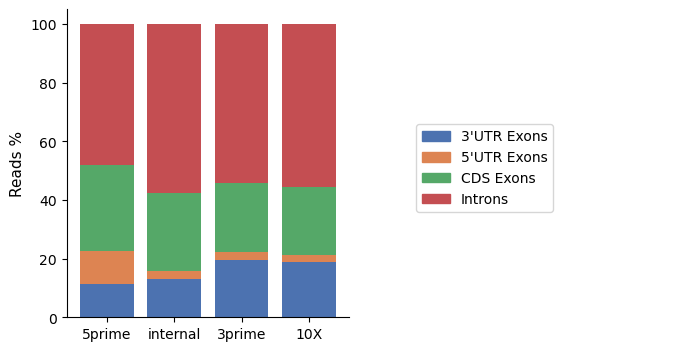

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), gridspec_kw={'width_ratios': [3, 3]})

width = 0.8     # the width of the bars: can also be len(x) sequence

palette = sns.color_palette(palette='deep',n_colors=4)


ax[0].bar(pivot.index, pivot["3'UTR_Exons"], width, color=palette[0])
ax[0].bar(pivot.index, pivot["5'UTR_Exons"], width, bottom=pivot["3'UTR_Exons"], color=palette[1])
ax[0].bar(pivot.index, pivot["CDS_Exons"], width, bottom=sum([pivot["3'UTR_Exons"], pivot["5'UTR_Exons"]]), color=palette[2])
ax[0].bar(pivot.index, pivot["Introns"], width, bottom=sum([pivot["3'UTR_Exons"], pivot["5'UTR_Exons"],pivot["CDS_Exons"]]), color=palette[3])


ax[0].spines.right.set_visible(False)
ax[0].spines.top.set_visible(False)

ax[0].set_ylabel('Reads %', fontsize=11)

colors = {"3'UTR Exons":palette[0], 
          "5'UTR Exons":palette[1],
          "CDS Exons":palette[2],
          "Introns":palette[3]
         }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

ax[1].legend(handles, labels, bbox_to_anchor=(0.05, 0.15, 0.5, 0.5))

ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].spines.bottom.set_visible(False)
ax[1].spines.left.set_visible(False)

ax[1].tick_params( 
    bottom=False,        
    labelbottom=False, 
    left=False,
    labelleft=False, 
            ) 

fig.savefig(output_dir+'read_distribution.pdf')
